In [1]:
from geopy.geocoders import Nominatim


def get_lat_long(city_name, country='Germany'):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(f"{city_name}, {country}")

    if location:
        latitude, longitude = location.latitude, location.longitude
        return latitude, longitude
    else:
        return None

In [3]:
get_lat_long("Offenbach")

(50.1055002, 8.7610698)

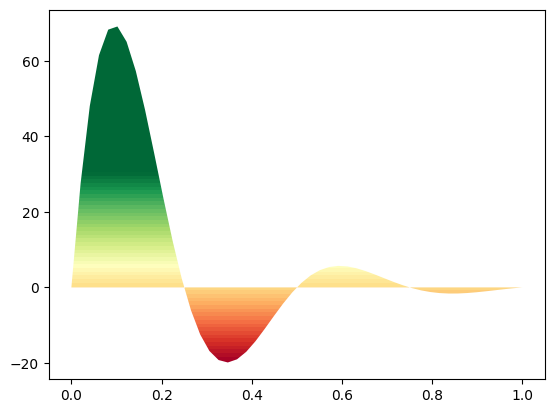

In [22]:
# create some sample data
x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x) * 120

fig, ax = plt.subplots()

# plot only the outline of the polygon, and capture the result
poly, = ax.fill(x, y, facecolor='none')

# get the extent of the axes
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# create a dummy image
img_data = np.arange(ymin, ymax, (ymax-ymin)/100.)
img_data = img_data.reshape(img_data.size, 1)

# plot and clip the image
im = ax.imshow(img_data, aspect='auto', origin='lower', cmap="RdYlGn", extent=[
               xmin, xmax, ymin, ymax], vmin=y.min(), vmax=30.)

im.set_clip_path(poly)

In [48]:
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [3, 1, 4, 6, 2]
})

# Create a plot using Plotly Express
fig = px.scatter(df, x='x', y='y', title='Fill Area Between Points and X-axis',
                 labels={'x': 'X-axis', 'y': 'Y-axis'})


# Add filled area between points and x-axis
fig.add_trace(go.Scatter(x=df['x'].tolist() + df['x'].tolist()[::-1],
                         y=df['y'].tolist() + [0] * len(df['y']),
                         fill='toself',
                         fillcolor="black",
                         line=dict(color='rgba(255, 0, 0, 0)'),
                         showlegend=False))

# Show the plot
fig.show()

In [50]:
import plotly.express as px
import numpy as np

arr = np.ones(shape=(50, 100))
y = np.arange(1, 51).reshape(50, 1)
arr = np.multiply(arr, y)


fig = px.imshow(arr, color_continuous_scale='bluered', origin='lower')
fig.show()

In [49]:
df['x'].tolist() + df['x'].tolist()[::-1]

[1, 2, 3, 4, 5, 5, 4, 3, 2, 1]

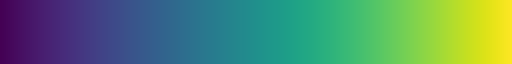